#Prelimnary Data Cleaning and EDA for the Vehicles dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loading the three datasets from the csv files
vehicles = pd.read_csv('/content/Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv')
crashes = pd.read_csv('/content/Maryland_Statewide_Vehicle_Crashes.csv')
persons = pd.read_csv('/content/Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning

#### Viewing the data

In [ ]:
vehicles.columns

Index(['HARM_EVENT_DESC', 'HARM_EVENT_CODE', 'CONTI_DIRECTION_DESC',
       'CONTI_DIRECTION_CODE', 'DAMAGE_DESC', 'DAMAGE_CODE', 'MOVEMENT_DESC',
       'MOVEMENT_CODE', 'VIN_NO', 'REPORT_NO', 'CV_BODY_TYPE_DESC',
       'CV_BODY_TYPE_CODE', 'VEH_YEAR', 'VEH_MAKE', 'VEH_MODEL',
       'COMMERCIAL_FLAG_DESC', 'COMMERCIAL_FLAG', 'HZM_NUM',
       'TOWED_AWAY_FLAG_DESC', 'TOWED_AWAY_FLAG', 'NUM_AXLES', 'GVW_DESC',
       'GVW_CODE', 'GOING_DIRECTION_DESC', 'GOING_DIRECTION_CODE',
       'BODY_TYPE_DESC', 'BODY_TYPE_CODE', 'DRIVERLESS_FLAG_DESC',
       'DRIVERLESS_FLAG', 'FIRE_FLAG_DESC', 'FIRE_FLAG', 'PARKED_FLAG_DESC',
       'PARKED_FLAG', 'SPEED_LIMIT', 'HIT_AND_RUN_FLAG_DESC',
       'HIT_AND_RUN_FLAG', 'HAZMAT_SPILL_FLAG_DESC', 'HAZMAT_SPILL_FLAG',
       'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC', 'TOWED_VEHICLE_CONFIG_CODE',
       'AREA_DAMAGED_CODE_IMP1', 'AREA_DAMAGED_CODE1', 'AREA_DAMAGED_CODE2',
       'AREA_DAMAGED_CODE3', 'AREA_DAMAGED_CODE_MAIN_DESC',
       'AREA_DAMAGED_

In [ ]:
# Viewing the top 5 rows of the dataset
vehicles.head()

,HARM_EVENT_DESC,HARM_EVENT_CODE,CONTI_DIRECTION_DESC,CONTI_DIRECTION_CODE,DAMAGE_DESC,DAMAGE_CODE,MOVEMENT_DESC,MOVEMENT_CODE,VIN_NO,REPORT_NO,CV_BODY_TYPE_DESC,CV_BODY_TYPE_CODE,VEH_YEAR,VEH_MAKE,VEH_MODEL,COMMERCIAL_FLAG_DESC,COMMERCIAL_FLAG,HZM_NUM,TOWED_AWAY_FLAG_DESC,TOWED_AWAY_FLAG,NUM_AXLES,GVW_DESC,GVW_CODE,GOING_DIRECTION_DESC,GOING_DIRECTION_CODE,BODY_TYPE_DESC,BODY_TYPE_CODE,DRIVERLESS_FLAG_DESC,DRIVERLESS_FLAG,FIRE_FLAG_DESC,FIRE_FLAG,PARKED_FLAG_DESC,PARKED_FLAG,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,HIT_AND_RUN_FLAG,HAZMAT_SPILL_FLAG_DESC,HAZMAT_SPILL_FLAG,VEHICLE_ID,TOWED_VEHICLE_CONFIG_DESC,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,YEAR,Quarter
0,Other Vehicle,1.0,North,N,Unknown,99,Unknown,99.0,NaN,AE5057004X,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,North,N,NaN,NaN,NaN,U,No,N,No,N,25,Yes,Y,NaN,NaN,47e2531d-8c69-470c-9198-502a46c7639e,Unknown,99,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2
1,Other Vehicle,1.0,North,N,Superficial,2,Moving Constant Speed,1.0,NMTKHMBX0JR025092,MSP7221001P,NaN,NaN,2018.0,TOYOTA,CAMRY,No,N,NaN,No,N,NaN,NaN,NaN,North,N,Passenger Car,2.00,No,N,No,N,No,N,55,No,N,NaN,NaN,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,Not Applicable,0,12.0,6.0,12.0,NaN,Twelve o'clock,12.0,2020,Q2
2,Other Vehicle,1.0,South,S,Functional,3,Stopped in Traffic Lane,6.0,2GNAXPEX5K6103012,DA37010040,NaN,NaN,2019.0,CHEVROLET,EQUINOX,No,N,NaN,No,N,NaN,NaN,NaN,South,S,(Sport) Utility Vehicle,23.08,No,N,No,N,No,N,30,No,N,NaN,NaN,f2c0d05c-ff70-4549-9d48-57c182eae6f2,Not Applicable,0,6.0,6.0,NaN,NaN,Six o'clock,6.0,2020,Q2
3,Fixed Object,9.0,Unknown,U,Unknown,99,Not Applicable,0.0,NaN,MDTA1791002C,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,Unknown,U,NaN,NaN,No,N,No,N,No,N,35,Yes,Y,NaN,NaN,5a55c4ee-17e9-4eed-bfe9-f5aca18f5b9e,Not Applicable,0,99.0,99.0,NaN,NaN,Unknown,99.0,2020,Q2
4,Other Vehicle,1.0,East,E,Disabling,4,Slowing or Stopping,3.0,5FNRL18672B048550,AE456100BL,NaN,NaN,2002.0,HONDA,VAN,No,N,NaN,Yes,Y,NaN,NaN,NaN,East,E,Passenger Car,2.00,No,N,No,N,No,N,35,No,N,NaN,NaN,23d968b0-be0e-4810-b6f0-34ef33fd7112,Not Applicable,0,6.0,6.0,12.0,NaN,Six o'clock,6.0,2020,Q2


In [ ]:
# Checking the shape of the dataframe
vehicles.shape
# 1334649 total rows

(1334649, 49)

#### Checking for any duplicate rows in the dataset

In [ ]:
vehicles[vehicles.duplicated(keep=False)]

,HARM_EVENT_DESC,HARM_EVENT_CODE,CONTI_DIRECTION_DESC,CONTI_DIRECTION_CODE,DAMAGE_DESC,DAMAGE_CODE,MOVEMENT_DESC,MOVEMENT_CODE,VIN_NO,REPORT_NO,CV_BODY_TYPE_DESC,CV_BODY_TYPE_CODE,VEH_YEAR,VEH_MAKE,VEH_MODEL,COMMERCIAL_FLAG_DESC,COMMERCIAL_FLAG,HZM_NUM,TOWED_AWAY_FLAG_DESC,TOWED_AWAY_FLAG,NUM_AXLES,GVW_DESC,GVW_CODE,GOING_DIRECTION_DESC,GOING_DIRECTION_CODE,BODY_TYPE_DESC,BODY_TYPE_CODE,DRIVERLESS_FLAG_DESC,DRIVERLESS_FLAG,FIRE_FLAG_DESC,FIRE_FLAG,PARKED_FLAG_DESC,PARKED_FLAG,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,HIT_AND_RUN_FLAG,HAZMAT_SPILL_FLAG_DESC,HAZMAT_SPILL_FLAG,VEHICLE_ID,TOWED_VEHICLE_CONFIG_DESC,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,YEAR,Quarter


##### There are no dupicate rows in the dataset. 

#### Checking for common columns in the three datasets 

In [ ]:
vehicles.columns.str.upper() & crashes.columns.str.upper() & persons.columns.str.upper()

Index(['REPORT_NO', 'YEAR', 'QUARTER'], dtype='object')

In [ ]:
vehicles.columns.str.lower() & persons.columns.str.lower()

Index(['movement_desc', 'movement_code', 'report_no', 'vehicle_id', 'year',
       'quarter'],
      dtype='object')

In [ ]:
vehicles.columns.str.lower() & crashes.columns.str.lower()

Index(['report_no', 'year', 'quarter'], dtype='object')

## Univariate EDA

> Here we look at the different columns in the dataset, the type and value of the data stored in them. This will help us understand the data and clean it for further analysis. 



In [ ]:
vehicles.head()

,HARM_EVENT_DESC,HARM_EVENT_CODE,CONTI_DIRECTION_DESC,CONTI_DIRECTION_CODE,DAMAGE_DESC,DAMAGE_CODE,MOVEMENT_DESC,MOVEMENT_CODE,VIN_NO,REPORT_NO,CV_BODY_TYPE_DESC,CV_BODY_TYPE_CODE,VEH_YEAR,VEH_MAKE,VEH_MODEL,COMMERCIAL_FLAG_DESC,COMMERCIAL_FLAG,HZM_NUM,TOWED_AWAY_FLAG_DESC,TOWED_AWAY_FLAG,NUM_AXLES,GVW_DESC,GVW_CODE,GOING_DIRECTION_DESC,GOING_DIRECTION_CODE,BODY_TYPE_DESC,BODY_TYPE_CODE,DRIVERLESS_FLAG_DESC,DRIVERLESS_FLAG,FIRE_FLAG_DESC,FIRE_FLAG,PARKED_FLAG_DESC,PARKED_FLAG,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,HIT_AND_RUN_FLAG,HAZMAT_SPILL_FLAG_DESC,HAZMAT_SPILL_FLAG,VEHICLE_ID,TOWED_VEHICLE_CONFIG_DESC,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,YEAR,Quarter
0,Other Vehicle,1.0,North,N,Unknown,99,Unknown,99.0,NaN,AE5057004X,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,North,N,NaN,NaN,NaN,U,No,N,No,N,25,Yes,Y,NaN,NaN,47e2531d-8c69-470c-9198-502a46c7639e,Unknown,99,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2
1,Other Vehicle,1.0,North,N,Superficial,2,Moving Constant Speed,1.0,NMTKHMBX0JR025092,MSP7221001P,NaN,NaN,2018.0,TOYOTA,CAMRY,No,N,NaN,No,N,NaN,NaN,NaN,North,N,Passenger Car,2.00,No,N,No,N,No,N,55,No,N,NaN,NaN,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,Not Applicable,0,12.0,6.0,12.0,NaN,Twelve o'clock,12.0,2020,Q2
2,Other Vehicle,1.0,South,S,Functional,3,Stopped in Traffic Lane,6.0,2GNAXPEX5K6103012,DA37010040,NaN,NaN,2019.0,CHEVROLET,EQUINOX,No,N,NaN,No,N,NaN,NaN,NaN,South,S,(Sport) Utility Vehicle,23.08,No,N,No,N,No,N,30,No,N,NaN,NaN,f2c0d05c-ff70-4549-9d48-57c182eae6f2,Not Applicable,0,6.0,6.0,NaN,NaN,Six o'clock,6.0,2020,Q2
3,Fixed Object,9.0,Unknown,U,Unknown,99,Not Applicable,0.0,NaN,MDTA1791002C,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,Unknown,U,NaN,NaN,No,N,No,N,No,N,35,Yes,Y,NaN,NaN,5a55c4ee-17e9-4eed-bfe9-f5aca18f5b9e,Not Applicable,0,99.0,99.0,NaN,NaN,Unknown,99.0,2020,Q2
4,Other Vehicle,1.0,East,E,Disabling,4,Slowing or Stopping,3.0,5FNRL18672B048550,AE456100BL,NaN,NaN,2002.0,HONDA,VAN,No,N,NaN,Yes,Y,NaN,NaN,NaN,East,E,Passenger Car,2.00,No,N,No,N,No,N,35,No,N,NaN,NaN,23d968b0-be0e-4810-b6f0-34ef33fd7112,Not Applicable,0,6.0,6.0,12.0,NaN,Six o'clock,6.0,2020,Q2


In [ ]:
vehicles.dtypes 

HARM_EVENT_DESC                 object
HARM_EVENT_CODE                float64
CONTI_DIRECTION_DESC            object
CONTI_DIRECTION_CODE            object
DAMAGE_DESC                     object
DAMAGE_CODE                      int64
MOVEMENT_DESC                   object
MOVEMENT_CODE                  float64
VIN_NO                          object
REPORT_NO                       object
CV_BODY_TYPE_DESC               object
CV_BODY_TYPE_CODE              float64
VEH_YEAR                       float64
VEH_MAKE                        object
VEH_MODEL                       object
COMMERCIAL_FLAG_DESC            object
COMMERCIAL_FLAG                 object
HZM_NUM                         object
TOWED_AWAY_FLAG_DESC            object
TOWED_AWAY_FLAG                 object
NUM_AXLES                      float64
GVW_DESC                        object
GVW_CODE                       float64
GOING_DIRECTION_DESC            object
GOING_DIRECTION_CODE            object
BODY_TYPE_DESC           

In [ ]:
vehicles.isnull().sum() *100/len(vehicles) 

HARM_EVENT_DESC                 0.000000
HARM_EVENT_CODE                 0.000000
CONTI_DIRECTION_DESC           10.817826
CONTI_DIRECTION_CODE           10.817826
DAMAGE_DESC                     0.000000
DAMAGE_CODE                     0.000000
MOVEMENT_DESC                   0.000000
MOVEMENT_CODE                   0.000000
VIN_NO                          4.887877
REPORT_NO                       0.000000
CV_BODY_TYPE_DESC              95.932339
CV_BODY_TYPE_CODE              95.932339
VEH_YEAR                        4.840973
VEH_MAKE                        0.022703
VEH_MODEL                       0.055670
COMMERCIAL_FLAG_DESC            0.000000
COMMERCIAL_FLAG                 0.000000
HZM_NUM                        99.817555
TOWED_AWAY_FLAG_DESC            0.654179
TOWED_AWAY_FLAG                 0.000000
NUM_AXLES                      95.939382
GVW_DESC                       95.932339
GVW_CODE                       95.932339
GOING_DIRECTION_DESC           10.817826
GOING_DIRECTION_

### Handeling Missing Data: Part 1

> 1. The code columns are removed from the dataset as they don't make sense without the description and hence cannot be used in the analysis efficiently. 
2. The colums that have more than 90% of the data missing are removed.
3. We create a new dataframe vehicles_refined to store the cleaned data. 


In [ ]:
  # Dropping columns that have more than 905 missing data.
vehicles_refined = vehicles.drop(['CV_BODY_TYPE_DESC', 'CV_BODY_TYPE_CODE', 'HZM_NUM', 'NUM_AXLES', 'GVW_DESC', 'GVW_CODE', 'HAZMAT_SPILL_FLAG_DESC', 'HAZMAT_SPILL_FLAG'], axis = 1)
vehicles_refined = vehicles_refined.drop(['HARM_EVENT_CODE', 'CONTI_DIRECTION_CODE', 'DAMAGE_CODE','MOVEMENT_CODE', 'COMMERCIAL_FLAG', 'TOWED_AWAY_FLAG', 'GOING_DIRECTION_CODE', 'BODY_TYPE_CODE', 'DRIVERLESS_FLAG', 'FIRE_FLAG', 'PARKED_FLAG', 'HIT_AND_RUN_FLAG', 'TOWED_VEHICLE_CONFIG_CODE' ], axis = 1)


In [ ]:
vehicles_refined.shape

(1334649, 28)

In [ ]:
vehicles_refined.columns

Index(['HARM_EVENT_DESC', 'CONTI_DIRECTION_DESC', 'DAMAGE_DESC',
       'MOVEMENT_DESC', 'VIN_NO', 'REPORT_NO', 'VEH_YEAR', 'VEH_MAKE',
       'VEH_MODEL', 'COMMERCIAL_FLAG_DESC', 'TOWED_AWAY_FLAG_DESC',
       'GOING_DIRECTION_DESC', 'BODY_TYPE_DESC', 'DRIVERLESS_FLAG_DESC',
       'FIRE_FLAG_DESC', 'PARKED_FLAG_DESC', 'SPEED_LIMIT',
       'HIT_AND_RUN_FLAG_DESC', 'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC',
       'AREA_DAMAGED_CODE_IMP1', 'AREA_DAMAGED_CODE1', 'AREA_DAMAGED_CODE2',
       'AREA_DAMAGED_CODE3', 'AREA_DAMAGED_CODE_MAIN_DESC',
       'AREA_DAMAGED_CODE_MAIN', 'YEAR', 'Quarter'],
      dtype='object')

In [ ]:
vehicles_refined.HARM_EVENT_DESC.unique()

array(['Other Vehicle', 'Fixed Object', 'Not Applicable',
       'Parked Vehicle', 'Off Road', 'Animal', 'Bicycle', 'Backing',
       'Unknown', 'Pedestrian', 'Other Object', 'Other Non Collision',
       'Overturn', 'Explosion or Fire', 'Units Separated', 'Other',
       'Spilled Cargo', 'Other Pedalcycle', 'U-turn', 'Immersion',
       'Other Conveyance', 'Thrown or Falling Object', 'Downhill Roadway',
       'Fell Jumped from Motor Vehicle', 'Jackknife', 'Railway Train'],
      dtype=object)

Text(0.5, 1.0, 'Bar plot for harm event description')

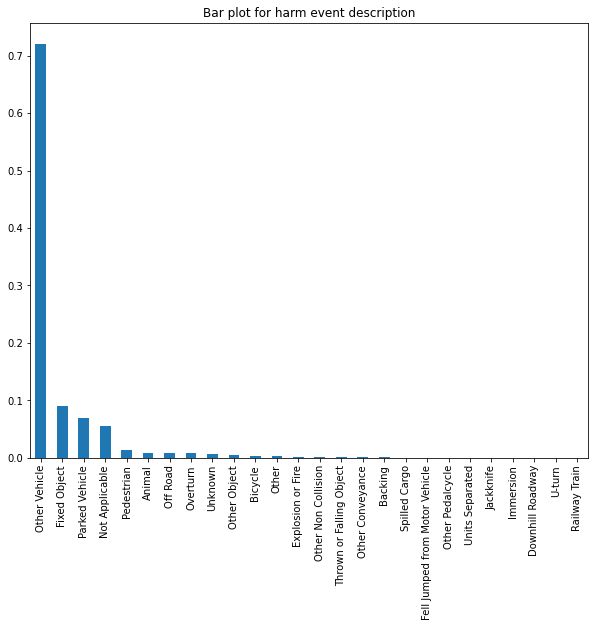

In [ ]:
# Plotting a bar plot to show the count of each of the subclasses of harm_event_decsription
harm_event_desc_count = vehicles.HARM_EVENT_DESC.value_counts()/vehicles.HARM_EVENT_DESC.value_counts().sum()
harm_event_desc_count.plot(x = harm_event_desc_count.index, kind = 'bar', figsize=(10, 8))
plt.title('Bar plot for harm event description')

##### The above graph implies more than 70% of the total crashes involve two moving vehicles.

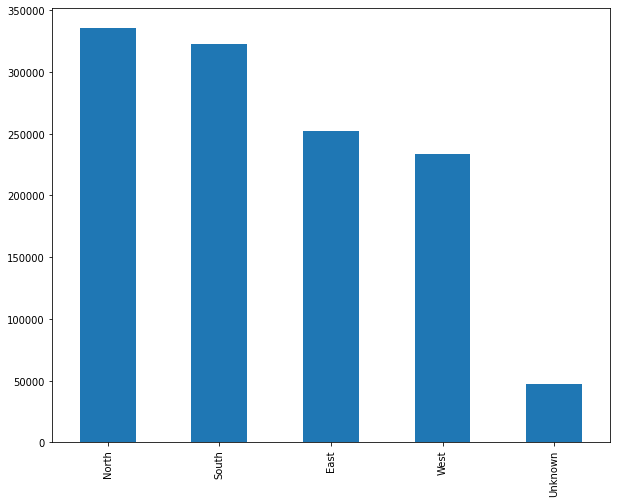

In [ ]:
conti_direction_desc_count = vehicles_refined.CONTI_DIRECTION_DESC.value_counts()
conti_direction_desc_count.plot(x = conti_direction_desc_count.index, kind = 'bar',  figsize = (10,8))

Text(0.5, 0, 'Damage description')

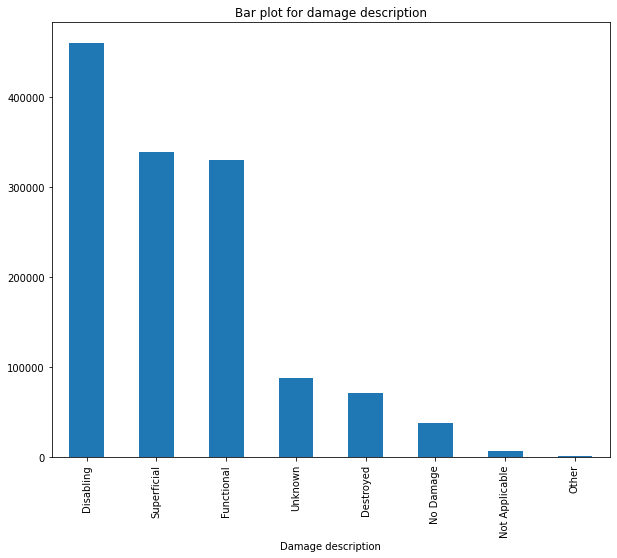

In [ ]:
# Plotting a bar plot for the damage_decsription
damage_description_count = vehicles_refined.DAMAGE_DESC.value_counts()
damage_description_count.plot(x = damage_description_count.index, kind = 'bar', figsize = (10,8))
plt.title('Bar plot for damage description')
plt.xlabel('Damage description')

##### This column that describes the damage is categorical. However, the categories are not very well defined. For example, the categories 'Unknow', 'Not Applicable' and 'Other' could mean similar things and are not very well distinguished. Also, the columns 'Diasbling' and 'Destroyed' seem very similar. 

Text(0.5, 0, 'Movement description')

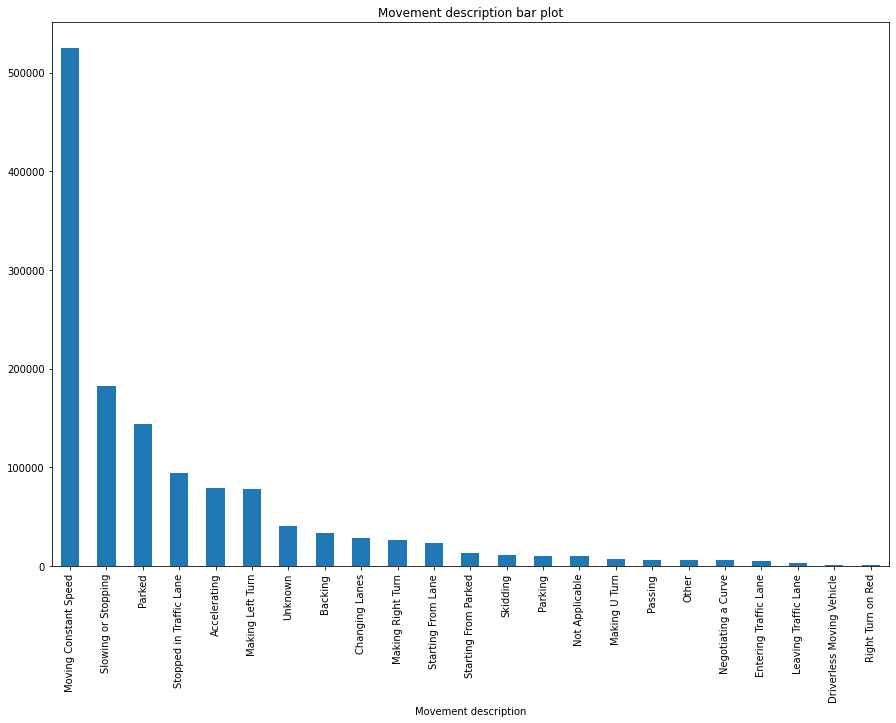

In [ ]:
# Plotting a bar plot for movement_desc
movement_desc = vehicles_refined.MOVEMENT_DESC.value_counts()
movement_desc.plot(x = movement_desc.index, kind = 'bar', figsize = (15,10))
plt.title('Movement description bar plot')
plt.xlabel('Movement description')

##### From the above graph it is clear that majority of the crashes occur when the vehicles are moving at constant speed rather than when accelerating or when changing lanes as expected. 

In [ ]:
vehicles_refined.VEH_YEAR

0             NaN
1          2018.0
2          2019.0
3             NaN
4          2002.0
            ...  
1334644    2012.0
1334645    2018.0
1334646    2017.0
1334647       NaN
1334648    2007.0
Name: VEH_YEAR, Length: 1334649, dtype: float64

In [ ]:
vehicles_refined.VEH_YEAR.replace(np.nan, 0, inplace = True)
vehicles_refined.VEH_YEAR


0             0.0
1          2018.0
2          2019.0
3             0.0
4          2002.0
            ...  
1334644    2012.0
1334645    2018.0
1334646    2017.0
1334647       0.0
1334648    2007.0
Name: VEH_YEAR, Length: 1334649, dtype: float64

In [ ]:
vehicles_refined.VEH_YEAR = vehicles_refined.VEH_YEAR.astype(int)
vehicles_refined.VEH_YEAR

0             0
1          2018
2          2019
3             0
4          2002
           ... 
1334644    2012
1334645    2018
1334646    2017
1334647       0
1334648    2007
Name: VEH_YEAR, Length: 1334649, dtype: int64

In [ ]:
print(vehicles_refined.VEH_YEAR.unique().min())
print(vehicles_refined.VEH_YEAR.unique().max())

0
9999


### Handeling missing data: Part 2
####  Here we truncate the rows to keep only the vehicle years that lie in the years 2000 to 2021 as this range seems the upper limit for the time period when a vehicle can be considered usable. 
#### This also removes all the inappropriate data such as 2050, 1, 99 etc. 

In [ ]:
vehicles_refined = vehicles_refined[(vehicles_refined.VEH_YEAR >= 2000.0) & (vehicles_refined.VEH_YEAR <=2021.0)]

In [ ]:
vehicles_refined.VEH_YEAR

1          2018
2          2019
4          2002
5          2009
6          2017
           ... 
1334643    2007
1334644    2012
1334645    2018
1334646    2017
1334648    2007
Name: VEH_YEAR, Length: 1162313, dtype: int64

In [ ]:
vehicles_refined.VEH_YEAR.unique()

array([2018, 2019, 2002, 2009, 2017, 2013, 2016, 2015, 2005, 2007, 2011,
       2021, 2020, 2004, 2012, 2006, 2008, 2014, 2010, 2003, 2001, 2000])

In [ ]:
vehicles_refined.shape
# 1334649

(1162313, 28)

#### The initial number of rows were 1334649 and now there are 1162313 rows. Therefore, 172336 rows were removed when we truncated the vehicle year to the range 2000 to 2021. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

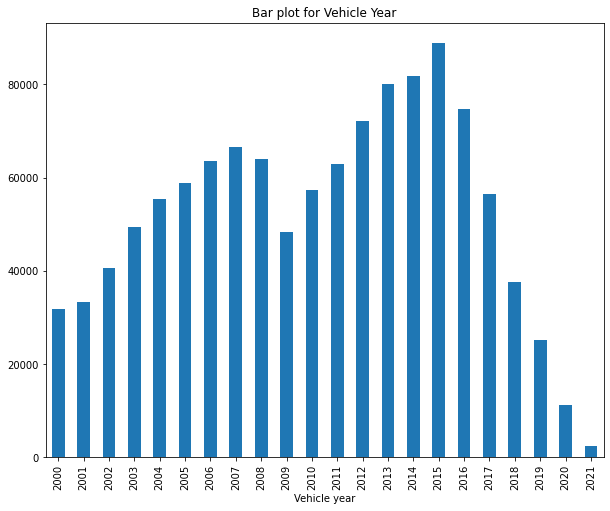

In [ ]:
veh_year = vehicles_refined.VEH_YEAR.value_counts()
veh_year.sort_index(inplace=True)
veh_year.plot(x = veh_year.index, kind = 'bar', figsize = (10,8))
plt.title('Bar plot for Vehicle Year')
plt.xlabel('Vehicle year')
plt.xticks()

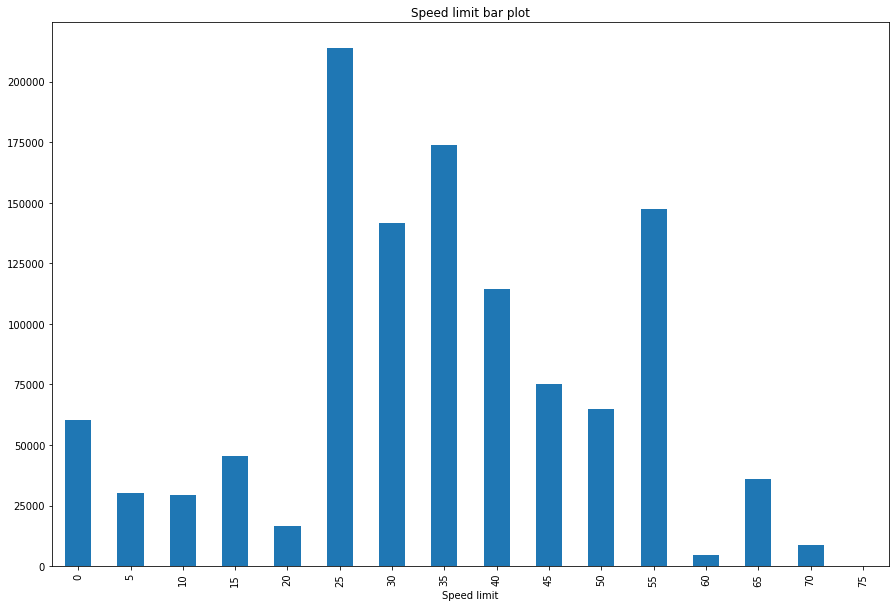

In [ ]:
# speed limit
plt.figure(figsize=[15,10])
vehicles_refined.SPEED_LIMIT.value_counts(dropna= False).sort_index().plot.bar()
plt.title('Speed limit bar plot')
plt.xlabel('Speed limit')
plt.show()

In [ ]:
vehicles_refined.SPEED_LIMIT.isnull().value_counts()

False    1162313
Name: SPEED_LIMIT, dtype: int64

In [ ]:
vehicles_refined.YEAR.unique()

array([2020, 2018, 2019, 2015, 2017, 2016, 2021])

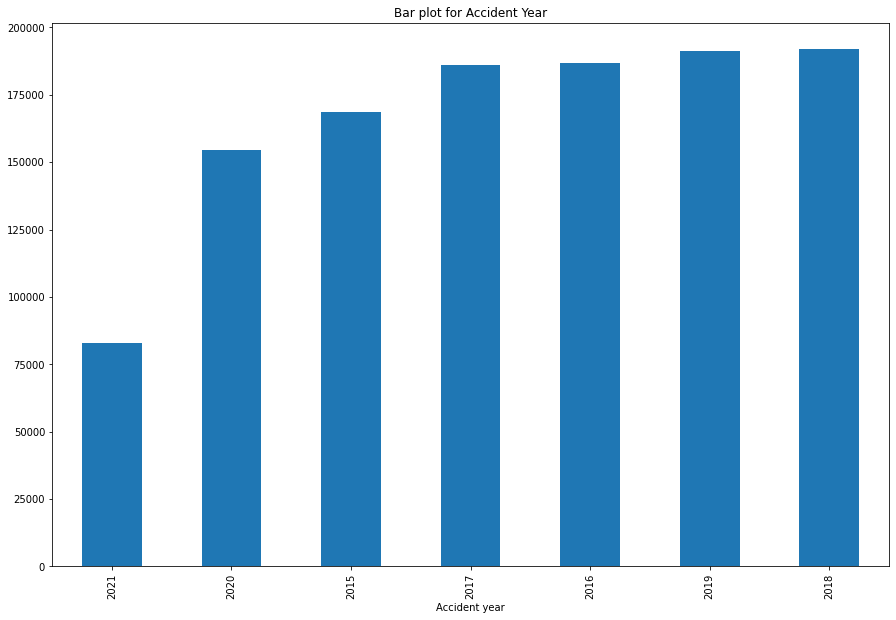

In [ ]:
plt.figure(figsize=[15,10])
vehicles_refined.YEAR.value_counts().sort_values().plot.bar()
plt.title('Bar plot for Accident Year')
plt.xlabel('Accident year')
plt.show()

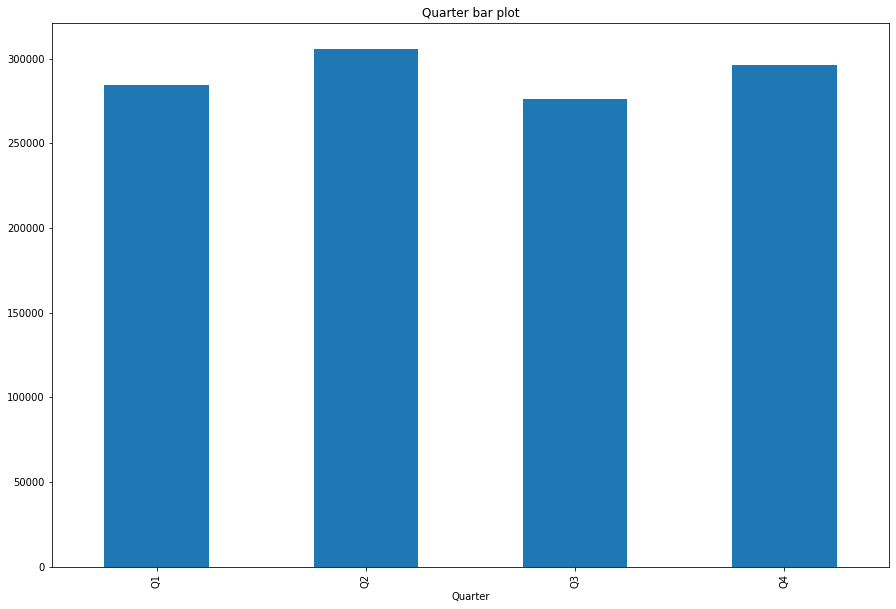

In [ ]:
plt.figure(figsize=[15,10])
vehicles_refined.Quarter.value_counts().sort_index().plot.bar()
plt.title('Quarter bar plot')
plt.xlabel('Quarter')
plt.show()

In [ ]:
vehicles_refined.columns

Index(['HARM_EVENT_DESC', 'CONTI_DIRECTION_DESC', 'DAMAGE_DESC',
       'MOVEMENT_DESC', 'VIN_NO', 'REPORT_NO', 'VEH_YEAR', 'VEH_MAKE',
       'VEH_MODEL', 'COMMERCIAL_FLAG_DESC', 'TOWED_AWAY_FLAG_DESC',
       'GOING_DIRECTION_DESC', 'BODY_TYPE_DESC', 'DRIVERLESS_FLAG_DESC',
       'FIRE_FLAG_DESC', 'PARKED_FLAG_DESC', 'SPEED_LIMIT',
       'HIT_AND_RUN_FLAG_DESC', 'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC',
       'AREA_DAMAGED_CODE_IMP1', 'AREA_DAMAGED_CODE1', 'AREA_DAMAGED_CODE2',
       'AREA_DAMAGED_CODE3', 'AREA_DAMAGED_CODE_MAIN_DESC',
       'AREA_DAMAGED_CODE_MAIN', 'YEAR', 'Quarter'],
      dtype='object')

### Handeling missing data: Part 3
#### Here we try to understand the area damage codes based on the given data. AREA_DAMAGED_CODE_MAIN_DESC needs to describe the AREA+DAMAGED_CODE_MAIN, however, the descriptions are wrongly mentioned in the description column. Therefore, we conclude that these area damage columns are not useful for further analysis and therefore drop them.

In [ ]:
print(vehicles_refined.AREA_DAMAGED_CODE1.nunique())
print(vehicles_refined.AREA_DAMAGED_CODE2.nunique())
print(vehicles_refined.AREA_DAMAGED_CODE3.nunique())
print(vehicles_refined.AREA_DAMAGED_CODE_MAIN.nunique())
print(vehicles_refined.AREA_DAMAGED_CODE_MAIN_DESC.nunique())

print(vehicles_refined.AREA_DAMAGED_CODE_IMP1.unique())
print(vehicles_refined.AREA_DAMAGED_CODE1.unique())
print(vehicles_refined.AREA_DAMAGED_CODE2.unique())
print(vehicles_refined.AREA_DAMAGED_CODE3.unique())
print(vehicles_refined.AREA_DAMAGED_CODE_MAIN.unique())
print(vehicles_refined.AREA_DAMAGED_CODE_MAIN_DESC.unique())

16
16
16
16
16
[12.  6.  1.  3. 11.  9.  2. 10.  4.  8.  5. 22.  7. 99. nan 98. 18.]
[ 6.  1.  3. 11. 12.  8. 10. 99.  4.  7.  5.  9. 22. nan  2. 18. 98.]
[12. nan 11.  4.  7.  9.  2.  6.  8. 10.  5.  3. 22. 18. 99. 98.  1.]
[nan 12.  5. 10. 11.  3.  9.  4.  8. 22.  6.  7. 18. 99. 98.  2.  1.]
[12.  6.  1.  5. 11.  9.  2. 10.  4.  8. 22. nan  7.  3. 99. 18. 98.]
["Twelve o'clock" "Six o'clock" "One o'clock" "Five o'clock"
 "Eleven o'clock" "Nine o'clock" "Two o'clock" "Ten o'clock"
 "Four o'clock" "Eight o'clock" 'Underside' nan "Seven o'clock"
 "Three o'clock" 'Unknown' 'Roof Top' 'Non-collision']


In [ ]:
vehicles_refined = vehicles_refined.drop(['AREA_DAMAGED_CODE_IMP1', 'AREA_DAMAGED_CODE1', 'AREA_DAMAGED_CODE2', 'AREA_DAMAGED_CODE3', 'AREA_DAMAGED_CODE_MAIN_DESC', 'AREA_DAMAGED_CODE_MAIN'],axis = 1)


In [ ]:
vehicles_refined.isnull().sum()*100/len(vehicles_refined)

HARM_EVENT_DESC               0.000000
CONTI_DIRECTION_DESC         11.383509
DAMAGE_DESC                   0.000000
MOVEMENT_DESC                 0.000000
VIN_NO                        0.035877
REPORT_NO                     0.000000
VEH_YEAR                      0.000000
VEH_MAKE                      0.007915
VEH_MODEL                     0.039146
COMMERCIAL_FLAG_DESC          0.000000
TOWED_AWAY_FLAG_DESC          0.276690
GOING_DIRECTION_DESC         11.383509
BODY_TYPE_DESC                0.032005
DRIVERLESS_FLAG_DESC          1.193052
FIRE_FLAG_DESC               15.181797
PARKED_FLAG_DESC              0.000000
SPEED_LIMIT                   0.000000
HIT_AND_RUN_FLAG_DESC         0.094467
VEHICLE_ID                    0.000000
TOWED_VEHICLE_CONFIG_DESC     0.000000
YEAR                          0.000000
Quarter                       0.000000
dtype: float64

#### We need to handle the missing values in the columns 'CONTI_DIRECTION_DESC', 'VIN_NO', 'VEH_MAKE', 'VEH_MODEL', 'TOWED_AWAY_FLAG_DESC', 'BODY_TYPE_DESC', 'GOING_DIRECTION_DESC', 'DRIVERLESS_FLAG_DESC', 'FIRE_FLAG_DESC', 'HIT_AND_RUN_FLAG_DESC'. 

>  

In [ ]:
vehicles_refined.shape

(1162313, 22)

#### The columns 'CONTI_DIRECTION_DESC' and 'GOING_DIRECTION_DESC' have around 902768 rows that have the same value. Aprt from this, there is nothing else we infer from these two columns. I am not sure if I should remove them or not!

In [ ]:
vehicles_refined[vehicles_refined['CONTI_DIRECTION_DESC'] == vehicles_refined['GOING_DIRECTION_DESC']]

,HARM_EVENT_DESC,CONTI_DIRECTION_DESC,DAMAGE_DESC,MOVEMENT_DESC,VIN_NO,REPORT_NO,VEH_YEAR,VEH_MAKE,VEH_MODEL,COMMERCIAL_FLAG_DESC,TOWED_AWAY_FLAG_DESC,GOING_DIRECTION_DESC,BODY_TYPE_DESC,DRIVERLESS_FLAG_DESC,FIRE_FLAG_DESC,PARKED_FLAG_DESC,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,VEHICLE_ID,TOWED_VEHICLE_CONFIG_DESC,YEAR,Quarter
1,Other Vehicle,North,Superficial,Moving Constant Speed,NMTKHMBX0JR025092,MSP7221001P,2018,TOYOTA,CAMRY,No,No,North,Passenger Car,No,No,No,55,No,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,Not Applicable,2020,Q2
2,Other Vehicle,South,Functional,Stopped in Traffic Lane,2GNAXPEX5K6103012,DA37010040,2019,CHEVROLET,EQUINOX,No,No,South,(Sport) Utility Vehicle,No,No,No,30,No,f2c0d05c-ff70-4549-9d48-57c182eae6f2,Not Applicable,2020,Q2
4,Other Vehicle,East,Disabling,Slowing or Stopping,5FNRL18672B048550,AE456100BL,2002,HONDA,VAN,No,Yes,East,Passenger Car,No,No,No,35,No,23d968b0-be0e-4810-b6f0-34ef33fd7112,Not Applicable,2020,Q2
6,Other Vehicle,West,Functional,Moving Constant Speed,19XFC1F49HE213193,ADJ778001H,2017,HOND,4S,No,No,West,Passenger Car,No,No,No,25,No,5be2e6f2-4b9c-4ede-b442-b4d1a6e82e72,Not Applicable,2020,Q2
7,Other Vehicle,West,Disabling,Moving Constant Speed,4V4NC9EH0KN234696,MSP7103003M,2019,VOLVO,TR,Yes,No,West,Truck Tractor,No,No,No,70,No,9f031508-933f-4171-9e4b-d74906223cd0,1 Semi Trailer,2020,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334642,Fixed Object,West,Superficial,Moving Constant Speed,JH4DC54855S004092,GC9357000C,2005,ACURA,RSX,No,Yes,West,Passenger Car,No,No,No,45,No,fb66cc12-824b-49c2-877c-7c41be84d4e2,Not Applicable,2021,Q2
1334643,Other Vehicle,South,Disabling,Slowing or Stopping,1N4BA41E17C823025,MSP70520054,2007,NISSAN,MAXIMA,No,No,South,Passenger Car,No,No,No,50,No,42bc17a2-5fe0-4221-a8d0-ff132df37555,Not Applicable,2021,Q2
1334645,Other Vehicle,West,Destroyed,Moving Constant Speed,KNAE15LA7J6036235,MSP6913009N,2018,KIA,STINGER,No,Yes,West,Passenger Car,No,No,No,40,No,dc20841b-f976-455b-b649-de374172da5a,Not Applicable,2021,Q2
1334646,Other Vehicle,South,Superficial,Moving Constant Speed,1FDFE4FS7HDC51335,ZR0357002K,2017,FORD,ECONOLINE,Yes,No,South,Transit Bus,No,No,No,45,No,6327f782-a36c-42ca-8eeb-c70bc4b6eeff,Not Applicable,2021,Q2


#### The column 'VIN_NO' is just a vehicle identification number and is going to be unique for each vehicle. Therefore, this is not going to be helpful in the statistical analysis. However, it can be used to identify the vehicle. Therefore, we keep this column as it is for now and will deal with the missing values if needed in the future analysis.

#### Dealing with VEH_MAKE and VEH_MODEL columns
> 1. Vehicle make seems to have lots of duplicates eg. TOYOTA, TOY and TOYA all represent the same company. As this seems to be too many variations to handle, we drop this column.
2. Vehicle model also has around 23616 different models and it seems like they are not going to be significant for statistical analysis or to find any trends in the data. Therefore, we drop these columns.

In [ ]:
vehicles_refined.columns

Index(['HARM_EVENT_DESC', 'CONTI_DIRECTION_DESC', 'DAMAGE_DESC',
       'MOVEMENT_DESC', 'VIN_NO', 'REPORT_NO', 'VEH_YEAR', 'VEH_MAKE',
       'VEH_MODEL', 'COMMERCIAL_FLAG_DESC', 'TOWED_AWAY_FLAG_DESC',
       'GOING_DIRECTION_DESC', 'BODY_TYPE_DESC', 'DRIVERLESS_FLAG_DESC',
       'FIRE_FLAG_DESC', 'PARKED_FLAG_DESC', 'SPEED_LIMIT',
       'HIT_AND_RUN_FLAG_DESC', 'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC',
       'YEAR', 'Quarter'],
      dtype='object')

In [ ]:
vehicles_refined.VEH_MAKE.unique()

array(['TOYOTA', 'CHEVROLET', 'HONDA', ..., 'RYAN', 'TOYTSCION', 'MTSU'],
      dtype=object)

In [ ]:
vehicles_refined.VEH_MAKE.nunique()

6851

In [ ]:
vehicles_refined.VEH_MAKE.value_counts()

FORD                148628
TOYOTA              114939
HONDA               111630
NISSAN               78011
CHEVY                46595
                     ...  
ACURA3.2T                1
HARLEY DAVIDISON         1
LESUS                    1
WRKHS                    1
NISSANM                  1
Name: VEH_MAKE, Length: 6851, dtype: int64

In [ ]:
vehicles_refined.VEH_MAKE.loc[vehicles_refined.VEH_MAKE.str.startswith('TOY') == True].value_counts()

TOYOTA           114939
TOYT              33580
TOYO               1023
TOY                 939
TOYTA               729
                  ...  
TOYOVA                1
TOYOYS                1
TOYOYA (RED)          1
TOYOTA - GOLD         1
TOYOVAL2005           1
Name: VEH_MAKE, Length: 119, dtype: int64

In [ ]:
vehicles_refined.VEH_MODEL.nunique()

23616

In [ ]:
vehicles_refined = vehicles_refined.drop(['VEH_MAKE', 'VEH_MODEL'], axis = 1)

In [ ]:
vehicles_refined.isnull().sum() *100/len(vehicles_refined)

HARM_EVENT_DESC               0.000000
CONTI_DIRECTION_DESC         11.383509
DAMAGE_DESC                   0.000000
MOVEMENT_DESC                 0.000000
VIN_NO                        0.035877
REPORT_NO                     0.000000
VEH_YEAR                      0.000000
COMMERCIAL_FLAG_DESC          0.000000
TOWED_AWAY_FLAG_DESC          0.276690
GOING_DIRECTION_DESC         11.383509
BODY_TYPE_DESC                0.032005
DRIVERLESS_FLAG_DESC          1.193052
FIRE_FLAG_DESC               15.181797
PARKED_FLAG_DESC              0.000000
SPEED_LIMIT                   0.000000
HIT_AND_RUN_FLAG_DESC         0.094467
VEHICLE_ID                    0.000000
TOWED_VEHICLE_CONFIG_DESC     0.000000
YEAR                          0.000000
Quarter                       0.000000
dtype: float64

In [ ]:
vehicles_refined[['TOWED_AWAY_FLAG_DESC', 'BODY_TYPE_DESC', 'DRIVERLESS_FLAG_DESC', 'FIRE_FLAG_DESC', 'HIT_AND_RUN_FLAG_DESC', 'TOWED_VEHICLE_CONFIG_DESC']]

,TOWED_AWAY_FLAG_DESC,BODY_TYPE_DESC,DRIVERLESS_FLAG_DESC,FIRE_FLAG_DESC,HIT_AND_RUN_FLAG_DESC,TOWED_VEHICLE_CONFIG_DESC
1,No,Passenger Car,No,No,No,Not Applicable
2,No,(Sport) Utility Vehicle,No,No,No,Not Applicable
4,Yes,Passenger Car,No,No,No,Not Applicable
5,No,Passenger Car,Yes,No,No,Not Applicable
6,No,Passenger Car,No,No,No,Not Applicable
...,...,...,...,...,...,...
1334643,No,Passenger Car,No,No,No,Not Applicable
1334644,No,Ambulance/Emergency,No,No,Yes,Not Applicable
1334645,Yes,Passenger Car,No,No,No,Not Applicable
1334646,No,Transit Bus,No,No,No,Not Applicable


In [ ]:
vehicles_refined.TOWED_AWAY_FLAG_DESC.value_counts(dropna = False)

No     686674
Yes    472423
NaN      3216
Name: TOWED_AWAY_FLAG_DESC, dtype: int64

In [ ]:
vehicles_refined.DRIVERLESS_FLAG_DESC.value_counts(dropna = False)

No     1032831
Yes     115615
NaN      13867
Name: DRIVERLESS_FLAG_DESC, dtype: int64

In [ ]:
vehicles_refined.FIRE_FLAG_DESC.value_counts(dropna = False)

No     981369
NaN    176460
Yes      4484
Name: FIRE_FLAG_DESC, dtype: int64

In [ ]:
vehicles_refined.HIT_AND_RUN_FLAG_DESC.value_counts(dropna = False)

No     1071776
Yes      89439
NaN       1098
Name: HIT_AND_RUN_FLAG_DESC, dtype: int64

In [ ]:
vehicles_refined.TOWED_VEHICLE_CONFIG_DESC.unique()

array(['Not Applicable', '1 Semi Trailer', 'Unknown', 'Boat Trailer',
       'Utility Trailer', '1 Full Trailer', 'Automobile',
       '2 Full Trailers', 'Other', 'Travel/Home Trailer',
       'Farm Equipment', 'Camper', '1 Semi + 1 Full Trailer',
       '3 Trailers', 'Mobile Home'], dtype=object)

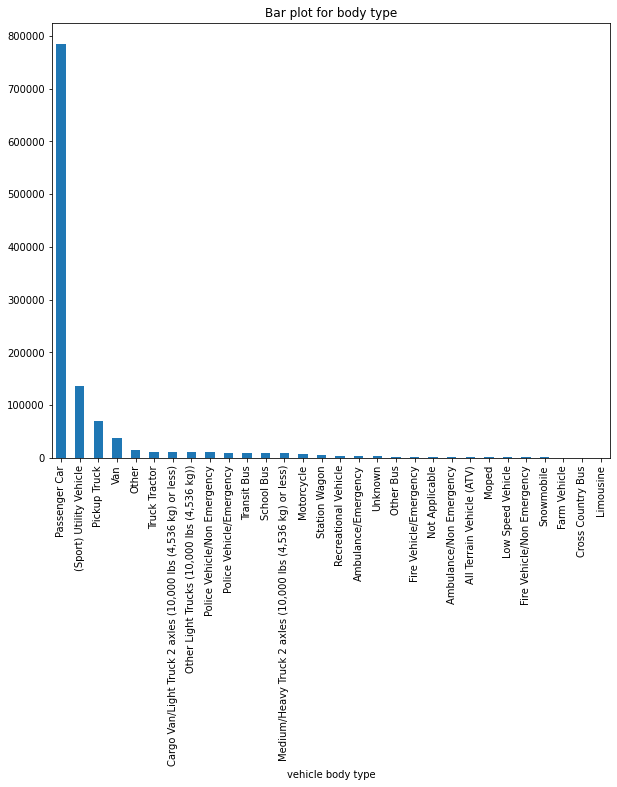

In [ ]:
# body_type_desc
plt.figure(figsize=[10,8])
vehicles_refined.BODY_TYPE_DESC.value_counts().plot.bar()
plt.title('Bar plot for body type')
plt.xlabel('vehicle body type')
plt.show()

#### We will replace NaN values from 'TOWED_AWAY_FLAG_DESC', 'DRIVERLESS_FLAG_DESC', 'FIRE_FLAG_DESC', and 'HIT_AND_RUN_FLAG_DESC' with a third category 'unknown'.

In [ ]:
vehicles_refined.TOWED_AWAY_FLAG_DESC.fillna('unknown', inplace = True)
vehicles_refined.DRIVERLESS_FLAG_DESC.fillna('unknown', inplace = True)
vehicles_refined.FIRE_FLAG_DESC.fillna('unknown', inplace = True)
vehicles_refined.HIT_AND_RUN_FLAG_DESC.fillna('unknown', inplace = True)

In [ ]:
print(vehicles_refined.TOWED_AWAY_FLAG_DESC.value_counts())
print(vehicles_refined.DRIVERLESS_FLAG_DESC.value_counts())
print(vehicles_refined.FIRE_FLAG_DESC.value_counts())
print(vehicles_refined.HIT_AND_RUN_FLAG_DESC.value_counts())

No         686674
Yes        472423
unknown      3216
Name: TOWED_AWAY_FLAG_DESC, dtype: int64
No         1032831
Yes         115615
unknown      13867
Name: DRIVERLESS_FLAG_DESC, dtype: int64
No         981369
unknown    176460
Yes          4484
Name: FIRE_FLAG_DESC, dtype: int64
No         1071776
Yes          89439
unknown       1098
Name: HIT_AND_RUN_FLAG_DESC, dtype: int64


In [ ]:
vehicles_refined.isnull().sum()*100/len(vehicles_refined)

HARM_EVENT_DESC               0.000000
CONTI_DIRECTION_DESC         11.383509
DAMAGE_DESC                   0.000000
MOVEMENT_DESC                 0.000000
VIN_NO                        0.035877
REPORT_NO                     0.000000
VEH_YEAR                      0.000000
COMMERCIAL_FLAG_DESC          0.000000
TOWED_AWAY_FLAG_DESC          0.000000
GOING_DIRECTION_DESC         11.383509
BODY_TYPE_DESC                0.032005
DRIVERLESS_FLAG_DESC          0.000000
FIRE_FLAG_DESC                0.000000
PARKED_FLAG_DESC              0.000000
SPEED_LIMIT                   0.000000
HIT_AND_RUN_FLAG_DESC         0.000000
VEHICLE_ID                    0.000000
TOWED_VEHICLE_CONFIG_DESC     0.000000
YEAR                          0.000000
Quarter                       0.000000
dtype: float64

### Finally, we will conclude the data cleaning process by writing this dataframe to a seperate csv file.

In [ ]:
vehicles_refined.to_csv('vehicles_refined.csv')

In [ ]:
vehicles_refined.shape

(1162313, 20)

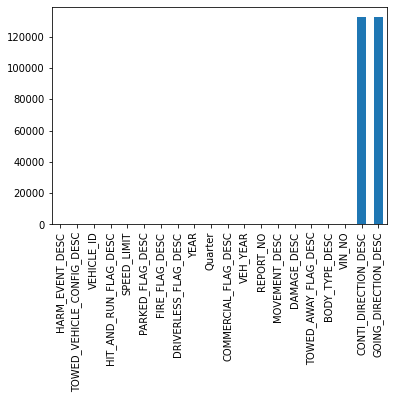

In [ ]:
vehicles_refined.isnull().sum().sort_values().plot(kind = 'bar')
plt.show()

### Some notes:
> 1. The harm_event_desc column is also present in crashes dataset with the name harm_event_desc1 and harm_event_desc2. Need to keep this in mind when merging. 


In [23]:
import pandas as pd
vehicles_refined = pd.read_csv('/content/vehicles_refined.csv')

In [24]:
vehicles_refined.columns

Index(['Unnamed: 0', 'HARM_EVENT_DESC', 'CONTI_DIRECTION_DESC', 'DAMAGE_DESC',
       'MOVEMENT_DESC', 'VIN_NO', 'REPORT_NO', 'VEH_YEAR',
       'COMMERCIAL_FLAG_DESC', 'TOWED_AWAY_FLAG_DESC', 'GOING_DIRECTION_DESC',
       'BODY_TYPE_DESC', 'DRIVERLESS_FLAG_DESC', 'FIRE_FLAG_DESC',
       'PARKED_FLAG_DESC', 'SPEED_LIMIT', 'HIT_AND_RUN_FLAG_DESC',
       'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC', 'YEAR', 'Quarter'],
      dtype='object')

In [25]:
vehicles_refined = vehicles_refined.drop(['CONTI_DIRECTION_DESC', 'GOING_DIRECTION_DESC','VIN_NO', 'Unnamed: 0', 'BODY_TYPE_DESC', 'TOWED_VEHICLE_CONFIG_DESC'], axis =1)

#### Concatenating the flag columns

In [26]:
print(vehicles_refined.TOWED_AWAY_FLAG_DESC.unique())
print(vehicles_refined.COMMERCIAL_FLAG_DESC.unique())
print(vehicles_refined.DRIVERLESS_FLAG_DESC.unique())
print(vehicles_refined.FIRE_FLAG_DESC.unique())
print(vehicles_refined.PARKED_FLAG_DESC.unique())
print(vehicles_refined.HIT_AND_RUN_FLAG_DESC.unique())


['No' 'Yes' 'unknown']
['No' 'Yes']
['No' 'Yes' 'unknown']
['No' 'unknown' 'Yes']
['No' 'Yes']
['No' 'Yes' 'unknown']


In [27]:
vehicles_refined.TOWED_AWAY_FLAG_DESC.replace(['No', 'Yes', 'unknown'], ['0', 'T', '0'], inplace = True)
vehicles_refined.COMMERCIAL_FLAG_DESC.replace(['No', 'Yes'], ['0', 'C'], inplace = True)
vehicles_refined.DRIVERLESS_FLAG_DESC.replace(['No', 'Yes', 'unknown'], ['0', 'D', '0'], inplace = True)
vehicles_refined.FIRE_FLAG_DESC.replace(['No', 'Yes', 'unknown'], ['0', 'F', '0'], inplace = True)
vehicles_refined.PARKED_FLAG_DESC.replace(['No', 'Yes'], ['0', 'P'], inplace = True)
vehicles_refined.HIT_AND_RUN_FLAG_DESC.replace(['No', 'Yes', 'unknown'], ['0', 'H', '0'], inplace = True)

In [28]:
print(vehicles_refined.TOWED_AWAY_FLAG_DESC.unique())
print(vehicles_refined.COMMERCIAL_FLAG_DESC.unique())
print(vehicles_refined.DRIVERLESS_FLAG_DESC.unique())
print(vehicles_refined.FIRE_FLAG_DESC.unique())
print(vehicles_refined.PARKED_FLAG_DESC.unique())
print(vehicles_refined.HIT_AND_RUN_FLAG_DESC.unique())


['0' 'T']
['0' 'C']
['0' 'D']
['0' 'F']
['0' 'P']
['0' 'H']


In [29]:
vehicles_refined['flags'] = vehicles_refined['TOWED_AWAY_FLAG_DESC'] + vehicles_refined['COMMERCIAL_FLAG_DESC'] + vehicles_refined['DRIVERLESS_FLAG_DESC'] + vehicles_refined['FIRE_FLAG_DESC'] + vehicles_refined['PARKED_FLAG_DESC'] + vehicles_refined['HIT_AND_RUN_FLAG_DESC']

In [30]:
vehicles_refined.flags.unique()

array(['000000', 'T00000', '00D0P0', '0C0000', '00000H', 'TC0000',
       'T0000H', '00D0PH', '00D000', '0000P0', '0C000H', '0000PH',
       'T00F00', 'T0D0P0', 'T000P0', 'T00F0H', 'T0D000', '0CD0P0',
       '0C00P0', 'TC0F00', '000F00', 'T000PH', 'T0D00H', '00D00H',
       'TCD000', '0C0F00', '0CD000', 'T00FP0', 'TC000H', '00DFP0',
       'T0DF0H', 'TC00P0', 'TCD0P0', '000F0H', 'T0D0PH', 'TCDF00',
       '0CD0PH', '0C0FP0', '0C00PH', '000FP0', 'T0DFP0', 'TC0FP0',
       '0CD00H', 'T0DF00', '00DF0H', 'T00FPH', '00DF00', '0CDFP0',
       'TCD00H', '0CDF00', 'TC00PH'], dtype=object)

In [34]:
vehicles_refined.flags = vehicles_refined.flags.str.replace('0','')

In [35]:
vehicles_refined.flags.unique()

array(['', 'T', 'DP', 'C', 'H', 'TC', 'TH', 'DPH', 'D', 'P', 'CH', 'PH',
       'TF', 'TDP', 'TP', 'TFH', 'TD', 'CDP', 'CP', 'TCF', 'F', 'TPH',
       'TDH', 'DH', 'TCD', 'CF', 'CD', 'TFP', 'TCH', 'DFP', 'TDFH', 'TCP',
       'TCDP', 'FH', 'TDPH', 'TCDF', 'CDPH', 'CFP', 'CPH', 'FP', 'TDFP',
       'TCFP', 'CDH', 'TDF', 'DFH', 'TFPH', 'DF', 'CDFP', 'TCDH', 'CDF',
       'TCPH'], dtype=object)

In [36]:
vehicles_refined.shape

(1162313, 16)

In [37]:
vehicles_refined.columns

Index(['HARM_EVENT_DESC', 'DAMAGE_DESC', 'MOVEMENT_DESC', 'REPORT_NO',
       'VEH_YEAR', 'COMMERCIAL_FLAG_DESC', 'TOWED_AWAY_FLAG_DESC',
       'DRIVERLESS_FLAG_DESC', 'FIRE_FLAG_DESC', 'PARKED_FLAG_DESC',
       'SPEED_LIMIT', 'HIT_AND_RUN_FLAG_DESC', 'VEHICLE_ID', 'YEAR', 'Quarter',
       'flags'],
      dtype='object')

In [38]:
vehicles_refined = vehicles_refined.drop(['TOWED_AWAY_FLAG_DESC', 'DRIVERLESS_FLAG_DESC', 'FIRE_FLAG_DESC', 'PARKED_FLAG_DESC','COMMERCIAL_FLAG_DESC','HIT_AND_RUN_FLAG_DESC'], axis = 1)

In [39]:
vehicles_refined.shape

(1162313, 10)

In [40]:
vehicles_refined.columns

Index(['HARM_EVENT_DESC', 'DAMAGE_DESC', 'MOVEMENT_DESC', 'REPORT_NO',
       'VEH_YEAR', 'SPEED_LIMIT', 'VEHICLE_ID', 'YEAR', 'Quarter', 'flags'],
      dtype='object')

In [41]:
vehicles_refined.to_csv('vehicles_refined_new.csv')